# Imports

In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Date
import datetime as dt
import time
from datetime import timedelta

In [3]:
silver = pd.read_csv('Acuity.csv')

NewSub = pd.read_csv('NewSubscriptions.csv')

## Acuity

In [3]:
# Create a copy of the DB
silver_acuity = silver.copy()
silver_acuity.shape

(26176, 20)

In [4]:
# Change dates to datetime Dtype
silver_acuity['APPOINTMENT_BODY_DATE'] = pd.to_datetime(silver_acuity['APPOINTMENT_BODY_DATE'])

# Drop unneeded columns
silver_acuity.drop(columns=['EVENT_TS', 'EVENT_TS_UTC', 'ANONYMOUS_ID','APPOINTMENT_BODY_FIRST_NAME',
       'APPOINTMENT_BODY_DATETIME_CREATED', 'APPOINTMENT_BODY_CALENDAR_ID','APPOINTMENT_BODY_CALENDAR_TIMEZONE',\
                    'APPOINTMENT_BODY_TIMEZONE', 'APPOINTMENT_BODY_LAST_NAME', 'APPOINTMENT_BODY_ID',\
                    'APPOINTMENT_BODY_NO_SHOW', \
                    'APPOINTMENT_TYPE_ID'], inplace=True)

silver_acuity['EVENT'].value_counts()

appointment_changed        19261
appointment_scheduled       5664
appointment_rescheduled      774
appointment_canceled         477
Name: EVENT, dtype: int64

In [5]:
# drop irrelevant appointments
na_dict= {'appointment_canceled' : np.nan,
'appointment_changed' : np.nan,
'appointment_rescheduled' : np.nan}

silver_acuity['EVENT'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['EVENT'].value_counts()

appointment_scheduled    5549
Name: EVENT, dtype: int64

In [6]:
silver_acuity['APPOINTMENT_BODY_CANCELED'].value_counts()

False    5548
True        1
Name: APPOINTMENT_BODY_CANCELED, dtype: int64

In [7]:
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                      4680
Hair Mineral Analysis Appointment       648
Follow Up Consultation                  147
Customer consultation                    66
Case Study                                5
Hair Mineral Analysis - Acquisition       3
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [8]:
# drop irrelevant appointments
na_dict= {'Hair Mineral Analysis - Acquisition':np.nan,
          'Follow Up Consultation':np.nan,
          'Customer consultation':np.nan,
          'Case Study':np.nan}

silver_acuity['APPOINTMENT_BODY_TYPE'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                    4680
Hair Mineral Analysis Appointment     648
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [9]:
silver_acuity.shape

(5328, 8)

In [10]:
#Round to the day
silver_acuity['APPOINTMENT_BODY_DATE'] = silver_acuity['APPOINTMENT_BODY_DATE'].dt.round('D')

silver_acuity['Today'] = pd.Timestamp('today')
silver_acuity['Today'] = silver_acuity['Today'].dt.round('D')

silver_acuity['Complete'] = (silver_acuity['Today']>silver_acuity['APPOINTMENT_BODY_DATE'])
silver_acuity['Complete'].value_counts()

True     4667
False     661
Name: Complete, dtype: int64

In [11]:
# Remove appointments in the future
silver_acuity['Complete'] = silver_acuity['Complete'].astype('str')

# drop irrelevant appointments
na_dict= {'False' : np.nan}

silver_acuity['Complete'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['Complete'].value_counts()

True    4667
Name: Complete, dtype: int64

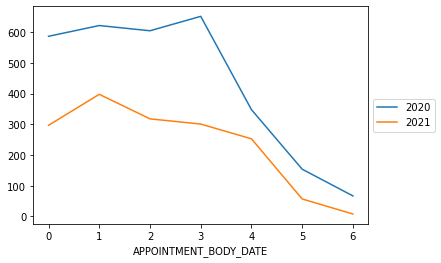

In [13]:
(silver_acuity.groupby([silver_acuity['APPOINTMENT_BODY_DATE'].dt.dayofweek,\
                       silver_acuity['APPOINTMENT_BODY_DATE'].dt.year])\
 ['EVENT'].count()).unstack().plot(kind='line')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [14]:
min(silver_acuity['APPOINTMENT_BODY_DATE'])

Timestamp('2020-01-26 00:00:00')

In [15]:
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                    4087
Hair Mineral Analysis Appointment     580
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [16]:
#QA instances
smail = silver_acuity['EMAIL'].nunique()
print ('unique emails = ',smail)

unique emails =  4014


In [17]:
clean_acuity = silver_acuity.groupby('EMAIL').agg({"APPOINTMENT_BODY_DATE":'min',\
                                'APPOINTMENT_BODY_TYPE':'last',\
                                'APPOINTMENT_BODY_CALENDAR':'last'\
                               })
clean_acuity.shape

(4014, 3)

## SUB

In [6]:
print('New Subscriptions',NewSub.shape)
NSemail = NewSub['EMAIL'].nunique()
print ('Unique Emails = ',NSemail)

# Change dates to datetime
NewSub['FIRST_ORDER_AT'] = pd.to_datetime(NewSub['FIRST_ORDER_AT'])

New Subscriptions (160271, 7)
Unique Emails =  50579


In [7]:
# Aggregate
NewSub1 = NewSub.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
NewSub1.shape

(50579, 6)

In [26]:
sub2=pd.merge(sub_2020,sub_2021,how='outer')
sub3=pd.merge(sub_2019,sub2,how='outer')

In [27]:
sub3 = sub3.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
sub3.shape

(151855, 6)

In [28]:
df20.ITEM_SUB_TYPE.value_counts()

GrowthPlan                                             47413
GrowthPlan 3                                           23282
GrowthPlan 2                                           10325
GrowthPlan,GrowthPlan                                    713
GrowthPlan,GrowthPlan 3                                   85
GrowthPlan 3,GrowthPlan                                   80
GrowthPlan 3,GrowthPlan 3                                 76
GrowthPlan,GrowthPlan 2                                   42
Non-Sub,GrowthPlan                                        39
GrowthPlan,Non-Sub                                        38
GrowthPlan 2,GrowthPlan                                   37
GrowthPlan 2,GrowthPlan 2                                 31
GrowthPlan 2,GrowthPlan 3                                 20
GrowthPlan 3,Non-Sub                                      18
Non-Sub,GrowthPlan 3                                      17
GrowthPlan 3,GrowthPlan 2                                 17
GrowthPlan,GrowthPlan,Gr

In [29]:
sub3.ITEM_SUB_TYPE.value_counts()

GrowthPlan                                             88928
GrowthPlan 3                                           47306
GrowthPlan 2                                           13536
GrowthPlan,GrowthPlan                                   1167
GrowthPlan 3,GrowthPlan                                  157
GrowthPlan,GrowthPlan 3                                  150
GrowthPlan 3,GrowthPlan 3                                115
GrowthPlan,Non-Sub                                        61
Non-Sub,GrowthPlan                                        55
GrowthPlan,GrowthPlan 2                                   54
GrowthPlan 2,GrowthPlan                                   52
GrowthPlan 3,Non-Sub                                      44
Prepay 6                                                  43
GrowthPlan 2,GrowthPlan 2                                 42
Non-Sub,GrowthPlan 3                                      38
GrowthPlan 2,GrowthPlan 3                                 24
GrowthPlan,GrowthPlan,Gr

In [30]:
sub3.describe()

,TOTAL_ORDER_VALUE,TOTAL_ORDERS
count,151836.000000,151836.000000
mean,408.063391,4.892371
std,378.234723,4.290529
min,-32.000000,1.000000
25%,158.000000,2.000000
50%,296.250000,3.000000
75%,553.000000,6.000000
max,5688.000000,61.000000


## Merge

In [31]:
sub = pd.merge(clean_acuity,sub3, how='left',on='EMAIL',copy=False)
sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 01hookerville@gmail.com to zusette1950@yahoo.com
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   APPOINTMENT_BODY_DATE       4014 non-null   datetime64[ns]
 1   APPOINTMENT_BODY_TYPE       4014 non-null   object        
 2   APPOINTMENT_BODY_CALENDAR   4014 non-null   object        
 3   FIRST_ORDER_AT              3036 non-null   datetime64[ns]
 4   TOTAL_ORDER_VALUE           3036 non-null   float64       
 5   TOTAL_ORDERS                3036 non-null   float64       
 6   ITEM_GENDER                 3036 non-null   object        
 7   ITEM_SUB_TYPE               3036 non-null   object        
 8   ITEM_PRODUCT_CORE_CATEGORY  3036 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 313.6+ KB


In [36]:
# clean up item sub
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan 3']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan 3']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 2,GrowthPlan']= 'GrowthPlan 2'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan 2']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan 2']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 2,GrowthPlan 2']= 'GrowthPlan 2'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,Non-Sub']= 'GrowthPlan 3'

sub['ITEM_SUB_TYPE'].value_counts()

GrowthPlan      1386
GrowthPlan 3    1066
GrowthPlan 2     584
Name: ITEM_SUB_TYPE, dtype: int64

In [37]:
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='Men,Men']= 'Men'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan']= 'Balance'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan 2']= 'Balance'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan 3']= 'Balance'

sub['ITEM_PRODUCT_CORE_CATEGORY'].value_counts()

Women      1496
Balance    1037
Men         503
Name: ITEM_PRODUCT_CORE_CATEGORY, dtype: int64

In [38]:
# Export data
sub.to_csv('sub.csv')

In [39]:
sub.describe()

,APPOINTMENT_BODY_DATE,APPOINTMENT_BODY_TYPE,APPOINTMENT_BODY_CALENDAR,FIRST_ORDER_AT,TOTAL_ORDER_VALUE,TOTAL_ORDERS,ITEM_GENDER,ITEM_SUB_TYPE,ITEM_PRODUCT_CORE_CATEGORY
count,4014,4014,4014,3036,3036.0,3036.0,3036,3036,3036
unique,128,4,12,3011,687.0,28.0,3,5,3
top,2020-11-12 00:00:00,Hair Consultation,"Dr. Ariana Zastrow, ND",Balance,158.0,2.0,Women,GrowthPlan,Women
freq,76,3532,708,25,134.0,601.0,2508,1372,1496
